# Prediction Using Supervised ML

#Task1
1. Predict the percentage of an student based on the no. of study hours.
2. This is a simple linear regression task as it involves just 2 variables.
3. What will be predicted score if a student studies for 9.25 hrs/ day?

In [1]:
#importing necessary libraires
import numpy as np                #for mathematical computation
import pandas as pd               #for data manipulation and analysis
import matplotlib.pyplot as plt   #for data visualization
import seaborn as sns             #for data visualization
%matplotlib inline                #for ploting inline plots

In [2]:
#importing dataset
path = "http://bit.ly/w-data"
data = pd.read_csv(path)
print("Data imported Successfully")
data

Data imported Successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
#printing first five records of data
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#printing last five records of data
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
#checking for null values
data.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [6]:
#total number of null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
#getting concise summary of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [8]:
#getting some basic statistical details like percentile, mean, std etc. of a data frame
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Visualizing data

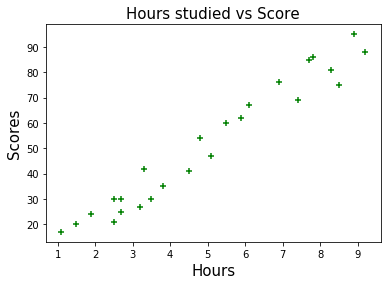

In [9]:
#ploting Scatter-plot
plt.xlabel('Hours',fontsize=15)
plt.ylabel('Scores',fontsize=15)
plt.title('Hours studied vs Score', fontsize=15)
plt.scatter(data.Hours,data.Scores,color='green',marker='+')
plt.show()

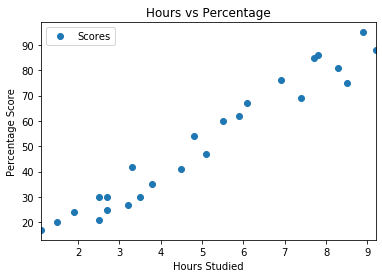

In [10]:
#we can use this plot also for visualizing relationship between our two variables
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

By seeing above plot, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

## Preparing the data

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [11]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [12]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

## Training the Algorithm

We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [13]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


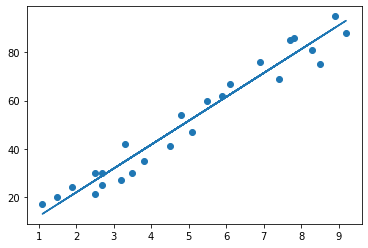

In [14]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_  # y = mx + c

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

## Making Predictions

Now that we have trained our algorithm, it's time to make some predictions.

In [15]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [16]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [20]:
# You can also test with your own data
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


## Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [21]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


## CONCLUSION

From the above result we can conclude that if a student studied for 9.25 then student will secure 93.69 Marks